# Lab 10: More Regression

In [2]:
# Run this cell to set up the notebook, but please don't change it.
import numpy as np
from datascience import *

# These lines set up the plotting functionality and formatting.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# 1. The Dataset

In this lab, we are *again* exploring movie screenplays. In particular, we have compiled a list of 5,000 words that occur in conversations between movie characters. For each movie, our dataset tells us the frequency with which each of these words occurs in certain conversations in its screenplay. All words have been converted to lowercase.

Run the cell below to read the `movies` table.

In [3]:
movies = Table.read_table('movies.csv')
movies.where("Title", "wild wild west").select(0, 1, 2, 3, 4, 14, 49, 1042, 4004)

Title,Year,Rating,Genre,# Words,breez,england,it,bravo
wild wild west,1999,4.3,comedy,3446,0,0,0.0212635,0


The above cell prints a few columns of the row for the comedy movie *Wild Wild West*.  The movie contains 3446 words. The word "it" appears 74 times, as it makes up  $\frac{74}{3446} \approx 0.021364$ of the words in the movie. The word "england" doesn't appear at all.
This numerical representation of a body of text, one that describes only the frequencies of individual words, is called a bag-of-words representation. A lot of information is discarded in this representation: the order of the words, the context of each word, who said what, the cast of characters and actors, etc. However, a bag-of-words representation is often used for machine learning applications as a reasonable starting point, because a great deal of information is also retained and expressed in a convenient and compact format.

All movie titles are unique. The `row_for_title` function provides fast access to the one row for each title. 

*Note: All movies in our dataset have their titles lower-cased.* 

In [4]:
title_index = movies.index_by('Title')
def row_for_title(title):
    """Return the row for a title, similar to the following expression (but faster)
    
    movies.where('Title', title).row(0)
    """
    return title_index.get(title)[0]

For example, the fastest way to find the frequency of "none" in the movie *The Terminator* is to access the `'none'` item from its row. Check the original table to see if this worked for you!

In [5]:
row_for_title('the terminator').item('none') 

0.0009633911368015

This dataset was extracted from [a dataset from Cornell University](http://www.cs.cornell.edu/~cristian/Cornell_Movie-Dialogs_Corpus.html). After transforming the dataset (e.g., converting the words to lowercase, removing the naughty words, and converting the counts to frequencies), we created this new dataset containing the frequency of 5000 common words in each movie.

## 2. Exploratory Data Analysis: Linear Regression

The first association we'll investigate is the association between the proportion of words that are `mom` and the proportion of words that are `dad`. As usual, we'll investigate our data visually before performing any numerical analysis.

Run the cell below to plot a scatter diagram of dad proportions vs mom proportions and to create the `mom_dad` table.

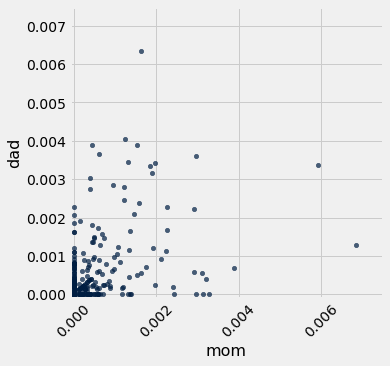

In [6]:
# Just run this cell!
mom_dad = movies.select("mom", "dad")
mom_dad.scatter("mom", "dad")
plots.axis([-0.0001, 0.0075, -0.0001, 0.0075]);
plots.xticks(rotation=45);

**Question 2.1.** Looking at that chart it is difficult to see if there is an association. Calculate the correlation coefficient for the association between proportion of words that are `mom` and the proportion of words that are `dad` for every movie in the dataset, and assign it to `mom_dad_r`.

<!--
BEGIN QUESTION
name: q2_1
-->

In [7]:
# Our solution took multiple lines
# these two arrays should make your code cleaner!
mom = movies.column("mom")
dad = movies.column("dad")

mom_su = (mom - np.mean(mom)) / np.std(mom)
dad_su = (dad - np.mean(dad)) / np.std(dad)

mom_dad_r = np.mean(mom_su*dad_su)
mom_dad_r

0.35822388523738152

**Question 2.2.** Calculate the slope and intercept of the regression line using the proportion of the words that are `mom` in the screenplay to predict the proportion of the words that are `dad`. Assign the slope to `mom_dad_slope` and the intercept to `mom_dad_intercept`.

In [8]:
mom_dad_slope = mom_dad_r * np.std(dad)/ np.std(mom)

mom_dad_intercept = np.average(dad) - mom_dad_slope * np.average(mom)

mom_dad_slope, mom_dad_intercept

(0.45654520014595967, 0.00027791154075060102)

**Question 2.3.** Choose two *different* words in the dataset with a correlation higher than 0.2 or smaller than -0.2 that are not `mom` and `dad` and plot a scatter plot with a line of best fit for them. The code to plot the scatter plot and line of best fit is given for you, you just need to calculate the correct values to `new_r`, `new_slope` and `new_intercept`.

*Hint: It's easier to think of words with a positive correlation, i.e. words that are often mentioned together*.

*Hint 2: Try to think of common phrases or idioms*.

<!--
BEGIN QUESTION
name: q2_3
manual: true
image: true
-->
<!-- EXPORT TO PDF -->

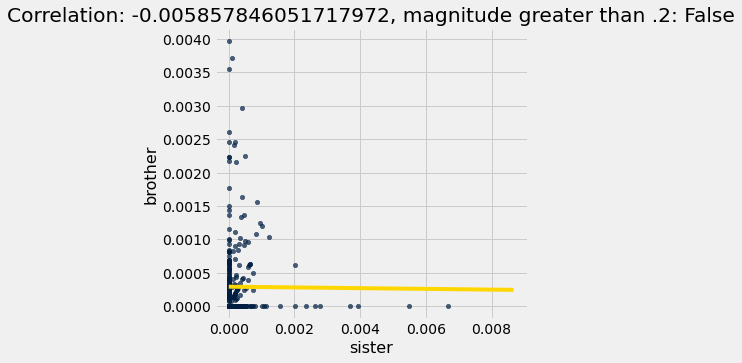

In [9]:
word_x = "sister"
word_y = "brother"

# These arrays should make your code cleaner!
arr_x = movies.column(word_x)
arr_y = movies.column(word_y)

x_su = (arr_x - np.mean(arr_x)) / np.std(arr_x)
y_su = (arr_y - np.mean(arr_y)) / np.std(arr_y)

new_r = np.mean(x_su * y_su)

new_slope = new_r * np.std(arr_y) / np.std(arr_x)
new_intercept = np.mean(arr_y - new_slope * np.mean(arr_x))

# DON'T CHANGE THESE LINES OF CODE
movies.scatter(word_x, word_y)
max_x = max(movies.column(word_x))
plots.title(f"Correlation: {new_r}, magnitude greater than .2: {abs(new_r) >= 0.2}")
plots.plot([0, max_x * 1.3], [new_intercept, new_intercept + new_slope * (max_x*1.3)], color='gold');

**Question 2.4.** Compute the the proportion of the words in a screenplay that are `dad` for a screenplay with `mom` occurring for 0.0005 proportion of the words and for a screenplay with `mom` occurring for 0.0025 proportion of the words

<!--
BEGIN QUESTION
name: q2_4
-->

In [11]:
dad_prop_for_mom0005 = mom_dad_slope * .005 + mom_dad_intercept
dad_prop_for_mom0025 = mom_dad_slope * .0025 + mom_dad_intercept

# Here is a helper function to print out your predictions.
# Don't modify the code below.
def print_prediction(mom, predicted_dad):
    print("For a screenplay with 'mom' occurring for", mom,
          "proportion of the words, we predict that 'dad' would occur in the screenplay", predicted_dad,
          "proportion of the words.")

print_prediction(0.0005, np.round(dad_prop_for_mom0005,6))
print_prediction(0.0025, np.round(dad_prop_for_mom0025,6))

For a screenplay with 'mom' occurring for 0.0005 proportion of the words, we predict that 'dad' would occur in the screenplay 0.002561 proportion of the words.
For a screenplay with 'mom' occurring for 0.0025 proportion of the words, we predict that 'dad' would occur in the screenplay 0.001419 proportion of the words.


The next cell plots the line that goes between those two points, which is (a segment of) the regression line.

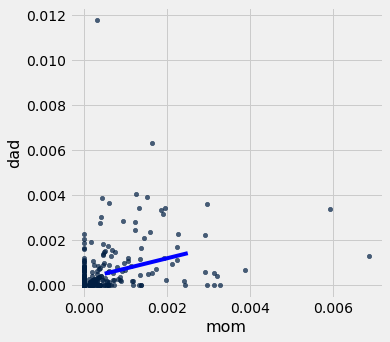

In [13]:
mom_dad.scatter('mom', 'dad')

def draw_line(slope=0, intercept=0, x=make_array(-4, 4), color='b'):
    y = x*slope + intercept
    plots.plot(x, y, color=color)

draw_line(
    slope = mom_dad_slope,
    intercept = mom_dad_intercept,
    x = make_array(0.0005, 0.0025)
)

**Question 2.5.** Make predictions for the proportion of words that are `dad` for each screenplay in the `mom_dad` table.  (Of course, we know exactly what the proportions are! We are doing this so we can see how accurate our predictions are).  Put these numbers into a column in a new table called `dad_predictions` that also includes the columns of the `mom_dad` table.

<!--
BEGIN QUESTION
name: q2_5
-->

In [14]:
dad_predictions =  mom_dad.with_column('predictions', (mom_dad_slope * mom_dad.column('mom') + mom_dad_intercept))
dad_predictions

mom,dad,predictions
0.000198926,0.000198926,0.00036873
0,0,0.000277912
0,0.000374322,0.000277912
0.000330797,0.000330797,0.000428935
0,0,0.000277912
0,0,0.000277912
0.000415455,0,0.000467585
0.000204457,0.000408914,0.000371255
0.000378215,0.00075643,0.000450584
0,0,0.000277912


**Question 2.6.** How close were we?  Compute the *residual* for each screenplay in the dataset.  The residual is the actual proportion of the words that are `dad` minus the predicted proportion of the words that are `dad`.  Add the residuals to `dad_predictions` as a new column called `residual` and name the resulting table `dad_residuals`.

<!--
BEGIN QUESTION
name: q2_5
-->

In [15]:
dad_residuals = dad_predictions.with_column('residual', dad_predictions.column('dad') - dad_predictions.column('predictions'))
dad_residuals

mom,dad,predictions,residual
0.000198926,0.000198926,0.00036873,-0.000169804
0,0,0.000277912,-0.000277912
0,0.000374322,0.000277912,9.641e-05
0.000330797,0.000330797,0.000428935,-9.81382e-05
0,0,0.000277912,-0.000277912
0,0,0.000277912,-0.000277912
0.000415455,0,0.000467585,-0.000467585
0.000204457,0.000408914,0.000371255,3.76589e-05
0.000378215,0.00075643,0.000450584,0.000305846
0,0,0.000277912,-0.000277912


Here is a plot of the residuals you computed.  Each point corresponds to one screenplay.  It shows how much our prediction over- or under-estimated the proportion of `dad` words in the screenplay. They do not look great...

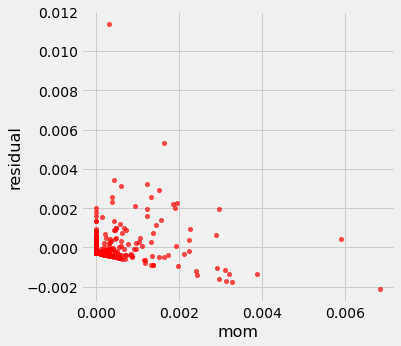

In [16]:
dad_residuals.scatter("mom", "residual", color="r")

## 3. Exploratory Data Analysis: Multiple Linear Regression

In class we saw that the best fit regression line used to predict y with x minimized the root mean squared error (rmse). 

$$
rmse ~=~ \sqrt{mean{(y - y_{estimate})}^2}
$$



**Question 3.1.** Define the function below to calculate the root mean squared error for a regression line that uses `word_x` as predictor for the `word_y` (using your words chosen in question 2.3).

In [17]:
def x_y_words_rmse(any_slope, any_intercept):

    q = movies.column(word_x) * any_slope + any_intercept
    t = movies.column(word_y)

    return np.mean((t - q) ** 2) ** 0.5

Run the cells below to see that the minimize function will (most likely) output the same values for the slope and intercept that you calculated in question 2.3.

In [22]:
minimize(x_y_words_rmse)

array([-0.0054794 ,  0.00028997])

In [23]:
new_slope, new_intercept

(-0.0054794231918765214, 0.00028996661772915402)

This method of using the minimize function to find the minimum root mean squared value for a function can be extended to nonlinear models as well as to models with multiple predictors. Choose two new words `word_w` and `word_z` that you think may be reasonably correlated with your `word_y`. You will then use these words to construct a multiple regression model to predict the proportion of the words in the script that are your `word_y`, based on the proportions of your w, x, and z words.


$$
y_{estimate} ~=~ a*word_w + b*word_x + c*word_z + d
$$

for constants $a$, $b$, $c$, and $d$.

**Question 3.2.** Define the function below to calculate the root mean squared error for a regression line that uses the w, x, and z words as predictors for the `word_y`.

In [24]:
w = 'black'
z = 'red'

def w_x_z_y_words_rmse(a, b, c, d):


    p = a * movies.column(w) + b * movies.column(word_x) + c * movies.column(z) + d
    ac = movies.column(word_y)

    return np.mean((ac - p) ** 2) ** .5

**Question 3.3.** Use the minimize function to find the coefficients  $a$, $b$, $c$, and $d$ that result in the minimal root mean squared error.

In [25]:
minimize(w_x_z_y_words_rmse)

array([ 0.16806327, -0.00607916, -0.02330293,  0.0002647 ])

**Question 3.4.** For the movie The Terminator, what proportion of the words in the script does your model predict will be your `word_y` (using the proportion of your `word_w`, `word_x`, and `word_z`)

In [26]:
.0111392 * row_for_title('the terminator').item(w) - .000720915  + row_for_title('the terminator').item(word_x) - .13190871


-0.132629625

You have finished lab 10! We'll use this data again in lab 11 in an attempt to classify the genre of movies.